## Demo of using DiscreteTimeShift

In [1]:
from noisy_load_profiles import perturbations, Pipeline
import numpy as np
import matplotlib.pyplot as plt

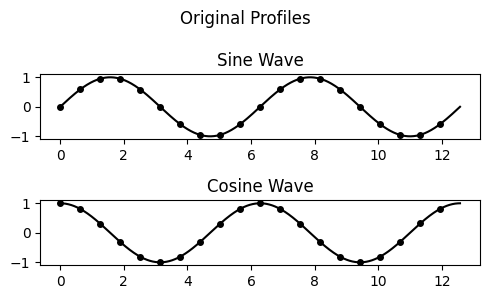

In [2]:
# build original load profiles, a sine and a cosine wave
timesteps = 1000
t = np.linspace(0, 4 * np.pi, timesteps)
original_profiles = np.array([np.sin(t), np.cos(t)])
original_profiles = original_profiles.T # shape (timesteps, 2)


# plot original profiles
fig, axs = plt.subplots(2, 1, figsize=(5, 3))

axs[0].plot(t, original_profiles[:, 0], label='Original Sine Wave', color="black", marker='o', markersize=4, markevery=50)
axs[0].set_title('Sine Wave')

axs[1].plot(t, original_profiles[:, 1], label='Original Cosine Wave', color='black',  marker='o', markersize=4, markevery=50)
axs[1].set_title('Cosine Wave')

fig.suptitle('Original Profiles')
fig.tight_layout()

In [3]:
help(perturbations.DiscreteTimeShift)

Help on class DiscreteTimeShift in module noisy_load_profiles.perturbations.systematic:

class DiscreteTimeShift(noisy_load_profiles.base.Perturbation)
 |  DiscreteTimeShift(shift_chance: float, shift_amount_lower_limit: int, shift_amount_upper_limit: int, seed: Optional[int] = None, transformation: Optional[Dict[str, Any]] = None, track_input_profiles: bool = False)
 |
 |  For each column, randomly shift values forward or backward by a random amount.
 |  The shift amount is uniformly sampled between shift_amount_lower_limit and shift_amount_upper_limit.
 |  The shift is applied with a given probability (shift_chance).
 |
 |  Stored transformation
 |  ---------------------
 |  {
 |      "do_shift": np.ndarray bool (C,),
 |      "shift_amounts": np.ndarray int (C,),
 |      "shift_indices": np.ndarray int (C,),
 |  }
 |
 |  Method resolution order:
 |      DiscreteTimeShift
 |      noisy_load_profiles.base.Perturbation
 |      abc.ABC
 |      builtins.object
 |
 |  Methods defined here:

In [15]:
# initialize a perturbation
perturbation = perturbations.DiscreteTimeShift(shift_chance=1, shift_amount_lower_limit=-250, shift_amount_upper_limit=250, seed=43)

# add a perturbation to a pipeline
pipeline = Pipeline([perturbation])

# apply the perturbation to the profiles
perturbed_profiles = pipeline.apply(original_profiles)


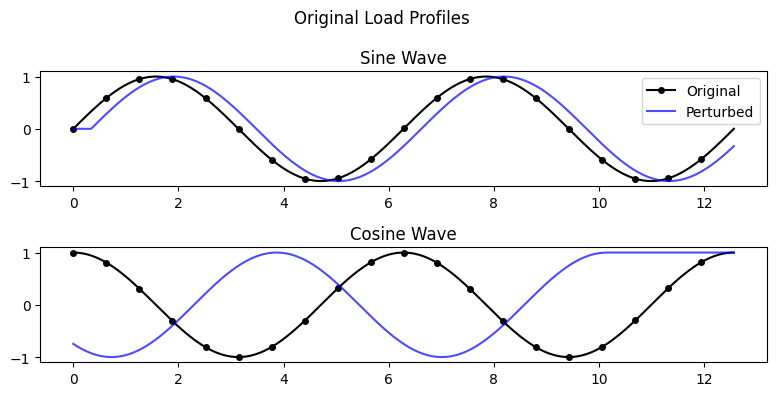

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4))

axs[0].plot(t, original_profiles[:, 0], label='Original', color="black", marker='o', markersize=4, markevery=50)
axs[0].plot(t, perturbed_profiles[:, 0], label='Perturbed', color='blue', alpha=0.7)
axs[0].set_title('Sine Wave')
axs[0].legend()

axs[1].plot(t, original_profiles[:, 1], label='Original', color='black',  marker='o', markersize=4, markevery=50)
axs[1].plot(t, perturbed_profiles[:, 1], label='Perturbed', color='blue' , alpha=0.7)
axs[1].set_title('Cosine Wave')


fig.suptitle('Original Load Profiles')
fig.tight_layout()

In [14]:
(perturbed_profiles == original_profiles).all()

np.True_